In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_formats = ['svg']


In [78]:
perfGPU_size = pd.read_csv("perfGPU10iter.csv", sep=';', header=0, names=['size','nbIte','time','bandwith','prop','gflop'])
perfCPU_size = pd.read_csv("perfCPU_size.csv", sep=';', header=0, names=['size','nbIte','time','bandwith'])

In [58]:
df = perfGPU_size
plt.title("Utilisation de la bande passante disponible (%)")
plt.xlabel(r'Taille du problème (log10)')
plt.ylabel(r'BP utilisée')
plt.plot(np.log10(df['size']), df['bandwith']/1448.39*100)
# print(df['size'], df['time'])
plt.grid()

NameError: name 'perfGPU_size' is not defined

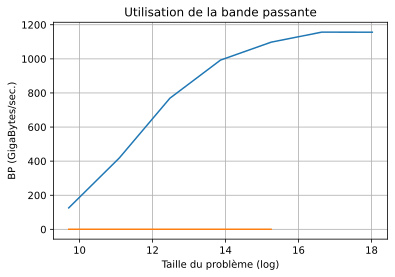

In [80]:
df = perfGPU_size
df2 = perfCPU_size

plt.title("Utilisation de la bande passante")
plt.xlabel(r'Taille du problème (log)')
plt.ylabel(r'BP (GigaBytes/sec.)')
plt.plot(np.log(df['size']), df['bandwith'])
plt.plot(np.log(df2['size']), df2['bandwith'])
plt.grid()

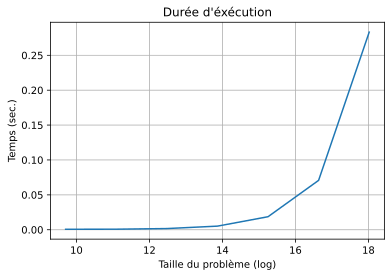

In [81]:
df = perfGPU_size
df2 = perfCPU_size

plt.title("Durée d'éxécution")
plt.xlabel(r'Taille du problème (log)')
plt.ylabel(r'Temps (sec.)')
plt.plot(np.log(df['size']), (df['time']))
# plt.plot(np.log(df2['size']), (df2['time']))
plt.grid()

In [59]:
cpu = pd.read_csv('perfCPUseq10iter.csv', sep=';',header=0, names=['size','nbIte','time','bandwith'])
cpu

,size,nbIte,time,bandwith
0,16384,10,0.106085,0.383017
1,65536,10,0.441430,0.368188
2,262144,10,1.909421,0.340479
3,1048576,10,7.627492,0.340934
4,4194304,10,25.254870,0.411876
5,16777216,10,77.530084,0.536663
6,67108864,10,226.466169,0.734900


In [61]:
gpu = pd.read_csv('perfGPU10iter.csv', sep=';', header=0, names=['size','nbIte','time','bandwith','prop','gflop'])
python = pd.read_csv('python_seq_log.csv', sep =';', header=0, names=['time'])
gpu
python

,time
0,0.029181
1,0.098261
2,0.413853
3,2.202590
4,11.113783
5,44.243664
6,170.574881


In [62]:
perf = [cpu['size'], python['time'], cpu['time'], gpu['time']]
headers = ['Size', 'Python seq.', 'CPP seq.', 'CUDA']

perf_df = pd.concat(perf, axis=1, keys=headers)

In [69]:
perf_df.round(decimals=4)

,Size,Python seq.,CPP seq.,CUDA
0,16384,0.0292,0.1061,0.0006
1,65536,0.0983,0.4414,0.0008
2,262144,0.4139,1.9094,0.0017
3,1048576,2.2026,7.6275,0.0052
4,4194304,11.1138,25.2549,0.0186
5,16777216,44.2437,77.5301,0.0708
6,67108864,170.5749,226.4662,0.2832


In [72]:
perf_df.round(decimals=4).to_latex("latex_tab.txt")

,Kernel,Small,Big
2,border_inflow,3.02,2.86
1,border_outflow,3.07,3.02
4,update_fin_inflow,3.05,3.02
6,update_obstacle,10.72,52.56
0,equilibrium,24.79,81.21
3,macroscopic,29.84,94.10
7,streaming,34.55,97.28
5,compute_collision,35.10,98.15


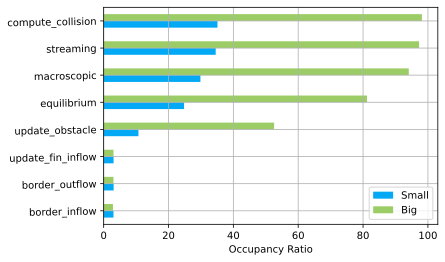

In [60]:
#taux d'occupation
df = pd.read_csv('ncu-logs/profilingGPU.csv', sep=';', names=['Kernel', 'Small', 'Big'], header=0, decimal=',')
# df.plot.hist(by='kernel')
df = df.sort_values('Big')

ax = df.plot.barh(x='Kernel', stacked=False, color={"Big": '#9ccc65', "Small": "#03a9f4"}, rot=1)
plt.xlabel('Occupancy Ratio')
plt.ylabel('')
plt.grid()
df


In [14]:
from collections import Counter

a = df['kernel']
letter_counts = Counter(a)
letter_counts
# df = pandas.DataFrame.from_dict(letter_counts, orient='index')
# df.plot(kind='bar')

Counter({'equilibrium': 1,
         'border_outflow': 1,
         'border_inflow': 1,
         'macroscopic': 1,
         'update_fin_inflow': 1,
         'compute_collision': 1,
         'update_obstacle': 1,
         'streaming': 1})